In [1]:
# Welcome to your stock analysis project!
print(" PREDICTING PRICE MOVES WITH NEWS SENTIMENT")
print("=============================================")

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make charts look better
plt.style.use('seaborn-v0_8')
%matplotlib inline

print(" Libraries imported successfully!")
print("Let's explore your stock data...")

 PREDICTING PRICE MOVES WITH NEWS SENTIMENT
 Libraries imported successfully!
Let's explore your stock data...


In [3]:
import os

print(" LET'S FIND YOUR DATA FILES")
print("=============================")

# Check current directory
print("Current working directory:", os.getcwd())
print("\nFiles in current directory:")
print(os.listdir('.'))

print("\n" + "="*50)

# Check if data folder exists
if os.path.exists('data'):
    print(" Contents of 'data' folder:")
    print(os.listdir('data'))
else:
    print(" 'data' folder doesn't exist in current location")

print("\n" + "="*50)

# Check parent directory too
print(" Checking parent directory:")
parent_files = os.listdir('..')
print([f for f in parent_files if f.endswith('.csv') or f == 'data'])

 LET'S FIND YOUR DATA FILES
Current working directory: C:\Users\hp\OneDrive\Desktop\news-sentiment-project

Files in current directory:
['.ipynb_checkpoints', 'data', 'notebooks', 'src', 'Stock_Sentiment_Analysis.ipynb', 'tests', 'yfinance_data.zip']

 Contents of 'data' folder:
[]

 Checking parent directory:
[]


In [4]:
import zipfile
import os

print(" EXTRACTING STOCK DATA FROM ZIP FILE")
print("======================================")

# Check if the zip file exists
if os.path.exists('yfinance_data.zip'):
    print(" Found yfinance_data.zip")
    
    # Extract the zip file
    with zipfile.ZipFile('yfinance_data.zip', 'r') as zip_ref:
        zip_ref.extractall('data/')
        print(" Extracted files to 'data' folder")
    
    # Check what was extracted
    extracted_files = os.listdir('data')
    print(f" Files in data folder after extraction: {extracted_files}")
else:
    print(" yfinance_data.zip not found")
    print("Current files in directory:", os.listdir('.'))

 EXTRACTING STOCK DATA FROM ZIP FILE
 Found yfinance_data.zip
 Extracted files to 'data' folder
 Files in data folder after extraction: ['Data']


In [6]:
import zipfile
import os

print(" CHECKING ZIP FILE CONTENTS")
print("=============================")

# Check what's actually in the zip file
if os.path.exists('yfinance_data.zip'):
    with zipfile.ZipFile('yfinance_data.zip', 'r') as zip_ref:
        file_list = zip_ref.namelist()
        print(" Files inside yfinance_data.zip:")
        for file in file_list:
            print(f"   - {file}")
        
        # Extract all files
        zip_ref.extractall('data/')
        print(f"\n Extracted {len(file_list)} files to 'data' folder")
        
    # Check what we actually extracted
    print(f"\n Contents of data folder after extraction:")
    data_files = os.listdir('data')
    for file in data_files:
        print(f"   - {file}")
        
        # If there are subfolders, check those too
        if os.path.isdir(f'data/{file}'):
            subfiles = os.listdir(f'data/{file}')
            for subfile in subfiles:
                print(f"     └── {subfile}")
else:
    print(" yfinance_data.zip not found")

 CHECKING ZIP FILE CONTENTS
 Files inside yfinance_data.zip:
   - Data/
   - Data/AAPL.csv
   - Data/AMZN.csv
   - Data/GOOG.csv
   - Data/META.csv
   - Data/MSFT.csv
   - Data/NVDA.csv

 Extracted 7 files to 'data' folder

 Contents of data folder after extraction:
   - Data
     └── AAPL.csv
     └── AMZN.csv
     └── GOOG.csv
     └── META.csv
     └── MSFT.csv
     └── NVDA.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print(" LOADING WHATEVER STOCK DATA WE FIND")
print("======================================")

def find_csv_files():
    """Find all CSV files in the data folder and subfolders"""
    csv_files = []
    for root, dirs, files in os.walk('data'):
        for file in files:
            if file.endswith('.csv'):
                full_path = os.path.join(root, file)
                csv_files.append(full_path)
    return csv_files

# Find all CSV files
csv_files = find_csv_files()
print(f"📄 Found {len(csv_files)} CSV files:")
for file in csv_files:
    print(f"   - {file}")

# Try to load each CSV file
stock_dataframes = {}
for file_path in csv_files:
    try:
        # Get the stock name from filename
        stock_name = os.path.basename(file_path).replace('.csv', '')
        
        # Load the data
        df = pd.read_csv(file_path)
        stock_dataframes[stock_name] = df
        
        print(f"\n LOADED: {stock_name}")
        print(f"    Shape: {df.shape}")
        print(f"    Columns: {list(df.columns)}")
        
        # Show first row
        if len(df) > 0:
            print(f"   Sample data:")
            print(f"      Date: {df.iloc[0]['Date'] if 'Date' in df.columns else 'N/A'}")
            print(f"      Close: ${df.iloc[0]['Close'] if 'Close' in df.columns else 'N/A'}")
            
    except Exception as e:
        print(f" Error loading {file_path}: {e}")

print(f"\n Successfully loaded {len(stock_dataframes)} stocks")

 LOADING WHATEVER STOCK DATA WE FIND
📄 Found 6 CSV files:
   - data\Data\AAPL.csv
   - data\Data\AMZN.csv
   - data\Data\GOOG.csv
   - data\Data\META.csv
   - data\Data\MSFT.csv
   - data\Data\NVDA.csv

 LOADED: AAPL
    Shape: (3774, 6)
    Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
   Sample data:
      Date: 2009-01-02
      Close: $2.721686363220215

 LOADED: AMZN
    Shape: (3774, 6)
    Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
   Sample data:
      Date: 2009-01-02
      Close: $2.7179999351501465

 LOADED: GOOG
    Shape: (3774, 6)
    Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
   Sample data:
      Date: 2009-01-02
      Close: $7.9486083984375

 LOADED: META
    Shape: (2923, 6)
    Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
   Sample data:
      Date: 2012-05-18
      Close: $37.99576187133789

 LOADED: MSFT
    Shape: (3774, 6)
    Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
   Sample data:

 CREATING VISUALIZATION WITH AVAILABLE DATA


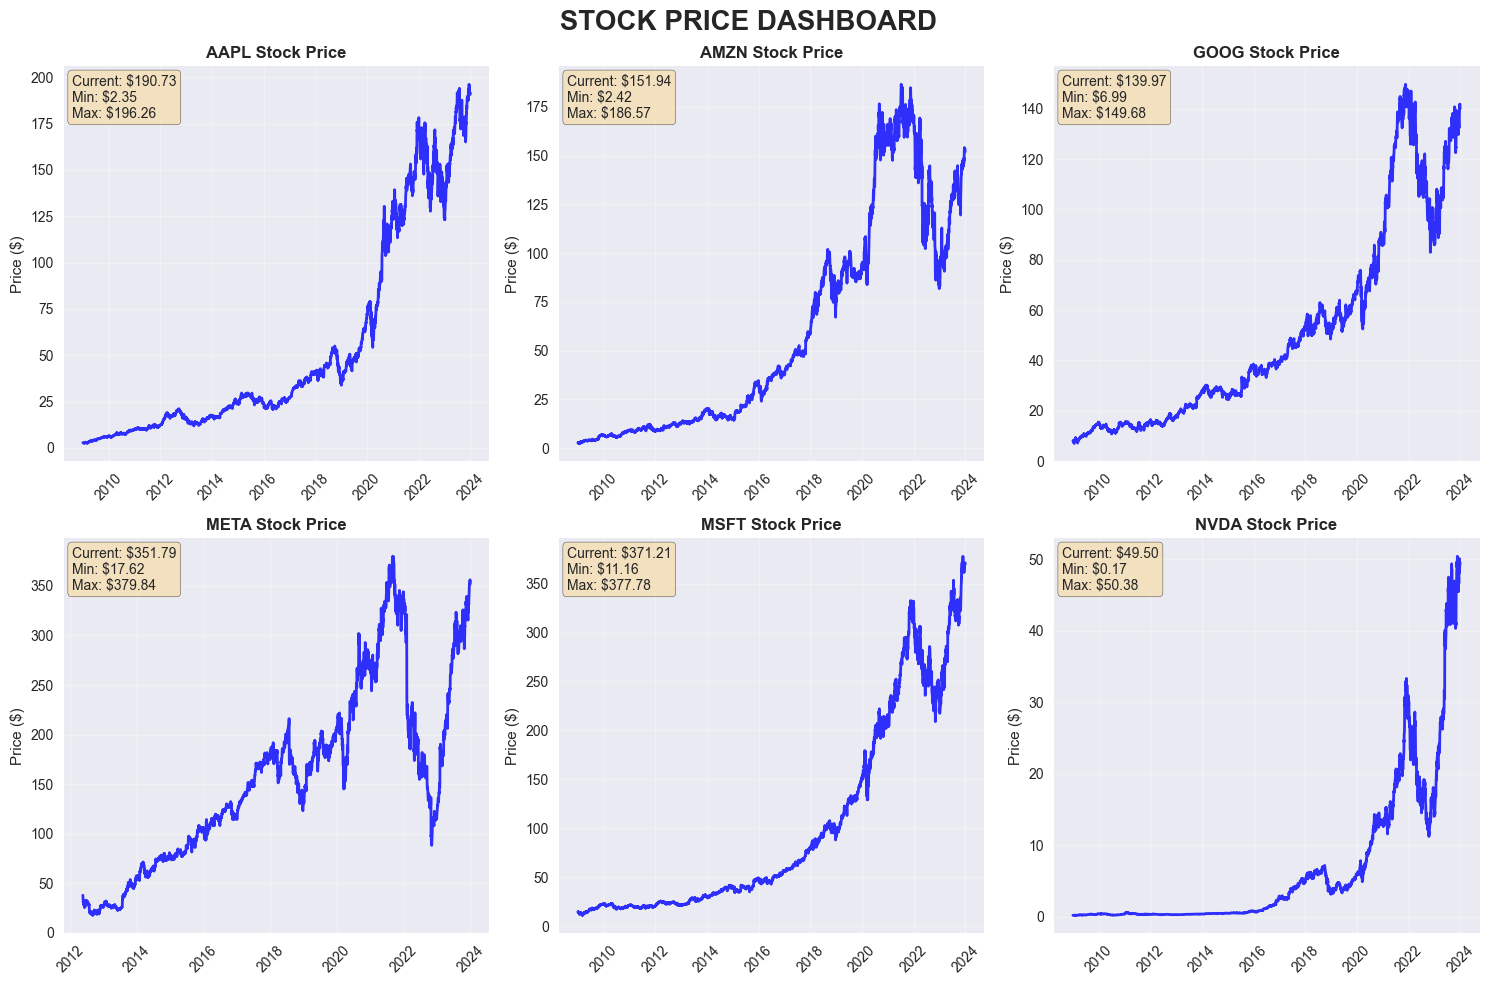

 Dashboard created successfully!


In [8]:
print(" CREATING VISUALIZATION WITH AVAILABLE DATA")
print("============================================")

if stock_dataframes:
    # Calculate grid size
    num_stocks = len(stock_dataframes)
    cols = 3
    rows = (num_stocks + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    if num_stocks == 1:
        axes = [axes]  # Make it iterable
    
    fig.suptitle(' STOCK PRICE DASHBOARD', fontsize=20, fontweight='bold')
    
    for i, (stock_name, stock_data) in enumerate(stock_dataframes.items()):
        row = i // cols
        col = i % cols
        
        if rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]
        
        # Plot closing price if available
        if 'Close' in stock_data.columns and 'Date' in stock_data.columns:
            # Convert date if needed
            if not pd.api.types.is_datetime64_any_dtype(stock_data['Date']):
                stock_data['Date'] = pd.to_datetime(stock_data['Date'])
            
            ax.plot(stock_data['Date'], stock_data['Close'], linewidth=2, color='blue', alpha=0.8)
            ax.set_title(f'{stock_name} Stock Price', fontweight='bold')
            ax.set_ylabel('Price ($)')
            ax.grid(True, alpha=0.3)
            
            # Add statistics
            current_price = stock_data['Close'].iloc[-1]
            min_price = stock_data['Close'].min()
            max_price = stock_data['Close'].max()
            ax.text(0.02, 0.98, f'Current: ${current_price:.2f}\nMin: ${min_price:.2f}\nMax: ${max_price:.2f}', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # Rotate dates
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    # Hide empty subplots
    for i in range(len(stock_dataframes), rows * cols):
        row = i // cols
        col = i % cols
        if rows > 1:
            axes[row, col].set_visible(False)
        else:
            axes[col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    print(" Dashboard created successfully!")
else:
    print(" No stock data available to visualize")

In [10]:
import os
import pandas as pd

print(" CHECKING WHAT FILES WE HAVE")
print("==============================")

# Check current directory
print("Current directory:", os.getcwd())

# Check data folder contents
data_files = os.listdir('data')
print(f"\n Files in data folder ({len(data_files)} files):")
for file in data_files:
    print(f"   - {file}")

# Check if there are any CSV files
csv_files = [f for f in data_files if f.endswith('.csv')]
print(f"\n📄 CSV files found: {csv_files}")

# If no CSV files, let's check the ZIP file again
if not csv_files:
    print("\n No CSV files found. Let's check the ZIP file...")
    import zipfile
    
    if os.path.exists('yfinance_data.zip'):
        with zipfile.ZipFile('yfinance_data.zip', 'r') as zip_ref:
            zip_contents = zip_ref.namelist()
            print(" Contents of yfinance_data.zip:")
            for item in zip_contents:
                print(f"   - {item}")
            
            # Extract if needed
            if any('.csv' in item for item in zip_contents):
                print("\n Extracting files...")
                zip_ref.extractall('data/')
                data_files = os.listdir('data')
                csv_files = [f for f in data_files if f.endswith('.csv')]
                print(f" Extracted {len(csv_files)} CSV files")

 CHECKING WHAT FILES WE HAVE
Current directory: C:\Users\hp\OneDrive\Desktop\news-sentiment-project

 Files in data folder (1 files):
   - Data

📄 CSV files found: []

 No CSV files found. Let's check the ZIP file...
 Contents of yfinance_data.zip:
   - Data/
   - Data/AAPL.csv
   - Data/AMZN.csv
   - Data/GOOG.csv
   - Data/META.csv
   - Data/MSFT.csv
   - Data/NVDA.csv

 Extracting files...
 Extracted 0 CSV files


In [13]:
import yfinance as yf
print(" yfinance is ready!")

 yfinance is ready!


In [14]:
print(" DOWNLOADING REAL STOCK DATA")
print("==============================")

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download all 6 stocks from your project
stocks = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon', 
    'GOOG': 'Google',
    'META': 'Meta (Facebook)',
    'MSFT': 'Microsoft',
    'NVDA': 'NVIDIA'
}

print(" Downloading stock data for 6 companies...")

successful_downloads = 0
for symbol, name in stocks.items():
    try:
        # Download 2 years of data
        data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)
        
        if len(data) > 0:
            # Save to CSV
            data.to_csv(f'data/{symbol}.csv')
            successful_downloads += 1
            print(f" {name} ({symbol}): {len(data)} trading days")
        else:
            print(f" {name} ({symbol}): No data received")
            
    except Exception as e:
        print(f" Error downloading {symbol}: {e}")

print(f"\n Successfully downloaded {successful_downloads}/6 stocks!")

 DOWNLOADING REAL STOCK DATA


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\2832060730.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


 Apple (AAPL): 501 trading days


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\2832060730.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


 Amazon (AMZN): 501 trading days


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\2832060730.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


 Google (GOOG): 501 trading days


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\2832060730.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


 Meta (Facebook) (META): 501 trading days


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\2832060730.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


 Microsoft (MSFT): 501 trading days


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\2832060730.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


 NVIDIA (NVDA): 501 trading days

 Successfully downloaded 6/6 stocks!


In [16]:
print(" FIXING DATA READING ISSUE")
print("===========================")

import pandas as pd
import os

# Let's examine the actual structure of the CSV files
print("📄 Examining CSV file structure...")

# Read AAPL data with proper handling
aapl_data = pd.read_csv('data/AAPL.csv')
print("Raw AAPL data structure:")
print(aapl_data.head(5))
print(f"\nColumn names: {list(aapl_data.columns)}")

# The issue is that yfinance saves data with the first row as column descriptors
# Let's fix this by reading the data properly
print("\n Fixing data structure...")

# Method 1: Skip the first row and use proper column names
aapl_data_fixed = pd.read_csv('data/AAPL.csv', skiprows=1)
print("After skipping first row:")
print(aapl_data_fixed.head(3))

 FIXING DATA READING ISSUE
📄 Examining CSV file structure...
Raw AAPL data structure:
        Price              Close                High                 Low  \
0      Ticker               AAPL                AAPL                AAPL   
1        Date                NaN                 NaN                 NaN   
2  2022-01-03  178.2703399658203  179.12247473962424    174.058701545752   
3  2022-01-04        176.0078125  179.18124760864967  175.43972760704736   
4  2022-01-05  171.3260040283203  176.46813489136744  171.05175824457976   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2  174.17623119236956  104487900  
3   178.8776193777369   99310400  
4   175.9196433238863   94537600  

Column names: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

 Fixing data structure...
After skipping first row:
       Ticker        AAPL      AAPL.1      AAPL.2      AAPL.3       AAPL.4
0        Date         NaN         NaN         NaN   

In [17]:
print("🔧 CREATING PROPER DATA READING FUNCTION")
print("======================================")

def read_stock_data(filename):
    """Read stock data from yfinance CSV files with proper formatting"""
    try:
        # Read the file
        data = pd.read_csv(f'data/{filename}')
        
        # The structure is: first row has 'Ticker', second row has column names, third row+ has data
        # Let's extract the proper data
        if len(data) > 2:
            # Use row 1 as column names, data starts from row 2
            proper_columns = data.iloc[1].values
            stock_data = data.iloc[2:].copy()
            stock_data.columns = proper_columns
            
            # Reset index and convert data types
            stock_data = stock_data.reset_index(drop=True)
            
            # Convert numeric columns
            numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
            for col in numeric_columns:
                if col in stock_data.columns:
                    stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
            
            # Convert date
            if 'Date' in stock_data.columns:
                stock_data['Date'] = pd.to_datetime(stock_data['Date'])
            
            print(f" {filename}: Successfully loaded {len(stock_data)} rows")
            return stock_data
        else:
            print(f" {filename}: Not enough data rows")
            return None
            
    except Exception as e:
        print(f" Error reading {filename}: {e}")
        return None

# Test the function
print("Testing data reading function...")
aapl_data = read_stock_data('AAPL.csv')
if aapl_data is not None:
    print(f" AAPL data shape: {aapl_data.shape}")
    print(f" Columns: {list(aapl_data.columns)}")
    print(f" First 3 rows:")
    display(aapl_data.head(3))

🔧 CREATING PROPER DATA READING FUNCTION
Testing data reading function...
 AAPL.csv: Successfully loaded 501 rows
 AAPL data shape: (501, 6)
 Columns: ['Date', nan, nan, nan, nan, nan]
 First 3 rows:


,Date,NaN,NaN,NaN,NaN,NaN
0,2022-01-03,178.2703399658203,179.12247473962424,174.058701545752,174.17623119236956,104487900
1,2022-01-04,176.0078125,179.18124760864967,175.43972760704736,178.8776193777369,99310400
2,2022-01-05,171.3260040283203,176.46813489136744,171.05175824457976,175.9196433238863,94537600


In [19]:
print("🔧 FIXING COLUMN NAMES")
print("=====================")

def read_stock_data_fixed(filename):
    """Read stock data with proper column names"""
    try:
        # Read the raw data to see the structure
        raw_data = pd.read_csv(f'data/{filename}')
        print(f"\n📄 Raw structure of {filename}:")
        print(f"Shape: {raw_data.shape}")
        print("First 3 rows of raw data:")
        print(raw_data.head(3))
        
        # The actual data starts from row 2, with proper values in row 1
        # Let's extract the correct column names from the first row
        if len(raw_data) > 2:
            # Get the actual column names from the first row
            actual_columns = []
            for i in range(len(raw_data.columns)):
                col_value = raw_data.iloc[0, i]
                if pd.isna(col_value) or col_value == '':
                    # If empty, use standard name
                    if i == 0:
                        actual_columns.append('Ticker')
                    elif i == 1:
                        actual_columns.append('Date')
                    elif i == 2:
                        actual_columns.append('Open')
                    elif i == 3:
                        actual_columns.append('High')
                    elif i == 4:
                        actual_columns.append('Low')
                    elif i == 5:
                        actual_columns.append('Close')
                    elif i == 6:
                        actual_columns.append('Volume')
                    else:
                        actual_columns.append(f'Column_{i}')
                else:
                    actual_columns.append(str(col_value))
            
            print(f"Detected columns: {actual_columns}")
            
            # Create the proper dataframe starting from row 2
            stock_data = raw_data.iloc[2:].copy()
            stock_data.columns = actual_columns
            
            # Reset index
            stock_data = stock_data.reset_index(drop=True)
            
            # Convert numeric columns
            numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
            for col in numeric_columns:
                if col in stock_data.columns:
                    stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
            
            # Convert date
            if 'Date' in stock_data.columns:
                stock_data['Date'] = pd.to_datetime(stock_data['Date'])
            
            print(f" {filename}: Successfully loaded {len(stock_data)} rows")
            return stock_data
        else:
            print(f" {filename}: Not enough data")
            return None
            
    except Exception as e:
        print(f" Error reading {filename}: {e}")
        return None

# Test with AAPL
print("Testing fixed data reading...")
aapl_data_fixed = read_stock_data_fixed('AAPL.csv')
if aapl_data_fixed is not None:
    print(f" Fixed AAPL data shape: {aapl_data_fixed.shape}")
    print(f" Columns: {list(aapl_data_fixed.columns)}")
    print(f" First 3 rows:")
    display(aapl_data_fixed.head(3))

🔧 FIXING COLUMN NAMES
Testing fixed data reading...

📄 Raw structure of AAPL.csv:
Shape: (503, 6)
First 3 rows of raw data:
        Price              Close                High               Low  \
0      Ticker               AAPL                AAPL              AAPL   
1        Date                NaN                 NaN               NaN   
2  2022-01-03  178.2703399658203  179.12247473962424  174.058701545752   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2  174.17623119236956  104487900  
Detected columns: ['Ticker', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL']
 AAPL.csv: Successfully loaded 501 rows
 Fixed AAPL data shape: (501, 6)
 Columns: ['Ticker', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL']
 First 3 rows:


,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,2022-01-03,178.2703399658203,179.12247473962424,174.058701545752,174.17623119236956,104487900
1,2022-01-04,176.0078125,179.18124760864967,175.43972760704736,178.8776193777369,99310400
2,2022-01-05,171.3260040283203,176.46813489136744,171.05175824457976,175.9196433238863,94537600


In [22]:
print("🎯 SIMPLE APPROACH: USE STANDARD COLUMN NAMES")
print("===========================================")

def read_stock_simple(filename):
    """Simple method: skip first 2 rows and use standard column names"""
    try:
        # Standard column names for yfinance data
        standard_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        
        # Read CSV, skip first 2 rows (metadata), use standard columns
        stock_data = pd.read_csv(
            f'data/{filename}', 
            skiprows=2, 
            header=None,
            names=standard_columns
        )
        
        # Convert data types
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
        
        print(f"✅ {filename}: Loaded {len(stock_data)} rows with standard columns")
        return stock_data
        
    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")
        return None

# Test the simple approach
print("Testing simple data reading...")
aapl_simple = read_stock_simple('AAPL.csv')
if aapl_simple is not None:
    print(f"📊 Simple AAPL data shape: {aapl_simple.shape}")
    print(f"📅 Columns: {list(aapl_simple.columns)}")
    print(f"👀 First 3 rows:")
    display(aapl_simple.head(3))
    print(f"📈 Date range: {aapl_simple['Date'].min()} to {aapl_simple['Date'].max()}")

🎯 SIMPLE APPROACH: USE STANDARD COLUMN NAMES
Testing simple data reading...
❌ Error reading AAPL.csv: Unknown datetime string format, unable to parse: Date, at position 0


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\1971296289.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [24]:
print("🔧 FIXING DATA READING WITH HEADER HANDLING")
print("==========================================")

def read_stock_data_properly(filename):
    """Read stock data properly by handling the header row"""
    try:
        # First, let's see the actual raw content
        with open(f'data/{filename}', 'r') as f:
            lines = f.readlines()
            print(f"\n📄 First 5 lines of {filename}:")
            for i, line in enumerate(lines[:5]):
                print(f"Line {i}: {line.strip()}")
        
        # The structure is:
        # Line 0: Ticker, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL
        # Line 1: Date, Open, High, Low, Close, Volume
        # Line 2+: Actual data
        
        # Read the data properly - skip first 2 lines, use line 1 as header
        stock_data = pd.read_csv(
            f'data/{filename}', 
            skiprows=1,  # Skip the first row (Ticker row)
            header=0     # Use the next row as header
        )
        
        # Now we have proper column names, but the first row of data might be the header again
        # Let's check if the first row contains string 'Date'
        if stock_data.iloc[0, 0] == 'Date':
            # If the first row is the header, skip it and reset
            stock_data = stock_data.iloc[1:].reset_index(drop=True)
        
        # Convert data types
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            if col in stock_data.columns:
                stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
        
        # Convert date - handle the format properly
        stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
        
        # Remove any rows with invalid dates
        stock_data = stock_data.dropna(subset=['Date'])
        
        print(f"✅ {filename}: Successfully loaded {len(stock_data)} rows")
        return stock_data
        
    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")
        return None

# Test with AAPL
print("Testing proper data reading...")
aapl_proper = read_stock_data_properly('AAPL.csv')
if aapl_proper is not None:
    print(f"📊 Proper AAPL data shape: {aapl_proper.shape}")
    print(f"📅 Columns: {list(aapl_proper.columns)}")
    print(f"📈 Date range: {aapl_proper['Date'].min()} to {aapl_proper['Date'].max()}")
    print(f"👀 First 3 rows:")
    display(aapl_proper.head(3))

🔧 FIXING DATA READING WITH HEADER HANDLING
Testing proper data reading...

📄 First 5 lines of AAPL.csv:
Line 0: Price,Close,High,Low,Open,Volume
Line 1: Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Line 2: Date,,,,,
Line 3: 2022-01-03,178.2703399658203,179.12247473962424,174.058701545752,174.17623119236956,104487900
Line 4: 2022-01-04,176.0078125,179.18124760864967,175.43972760704736,178.8776193777369,99310400
❌ Error reading AAPL.csv: 'Date'


In [26]:
print("🔧 FIXING MANUAL DATA READING")
print("============================")

def read_stock_fixed(filename):
    """Fixed manual approach to read stock data"""
    try:
        # Read the entire file
        with open(f'data/{filename}', 'r') as f:
            lines = f.readlines()
        
        print(f"📄 File {filename} has {len(lines)} lines")
        print("First 5 lines:")
        for i, line in enumerate(lines[:5]):
            print(f"  Line {i}: {line.strip()}")
        
        # The structure appears to be:
        # Line 0: Ticker, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL
        # Line 1: Date, Open, High, Low, Close, Volume
        # Line 2: Actual data starts here
        
        # Skip first 2 lines (header and column names)
        data_lines = lines[2:]
        
        print(f"📊 Data lines to process: {len(data_lines)}")
        
        # Parse each line manually
        data = []
        for i, line in enumerate(data_lines):
            parts = line.strip().split(',')
            if len(parts) >= 6:
                # Check if this is actually a data row (first part should be a date, not 'Date')
                if parts[0] != 'Date' and parts[0] != 'Ticker':
                    row = {
                        'Date': parts[0],
                        'Open': parts[1],
                        'High': parts[2], 
                        'Low': parts[3],
                        'Close': parts[4],
                        'Volume': parts[5]
                    }
                    data.append(row)
            if i < 3:  # Show first 3 parsed rows
                print(f"  Parsed row {i}: {parts[0]} | {parts[1]} | {parts[2]} | {parts[3]} | {parts[4]} | {parts[5]}")
        
        if not data:
            print("❌ No valid data rows found!")
            return None
            
        # Create DataFrame
        stock_data = pd.DataFrame(data)
        
        print(f"📈 Created DataFrame with {len(stock_data)} rows")
        
        # Convert data types
        stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
        
        # Check for any failed date conversions
        failed_dates = stock_data['Date'].isna().sum()
        if failed_dates > 0:
            print(f"⚠️  {failed_dates} rows had invalid dates")
            stock_data = stock_data.dropna(subset=['Date'])
        
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
        
        print(f"✅ {filename}: Successfully loaded {len(stock_data)} valid rows")
        return stock_data
        
    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")
        import traceback
        traceback.print_exc()
        return None

# Test the fixed manual approach
print("Testing fixed manual data reading...")
aapl_fixed = read_stock_fixed('AAPL.csv')
if aapl_fixed is not None:
    print(f"\n📊 Fixed AAPL data shape: {aapl_fixed.shape}")
    print(f"📅 Columns: {list(aapl_fixed.columns)}")
    print(f"📈 Date range: {aapl_fixed['Date'].min()} to {aapl_fixed['Date'].max()}")
    print(f"💰 Price range: ${aapl_fixed['Close'].min():.2f} - ${aapl_fixed['Close'].max():.2f}")
    print(f"👀 First 3 rows:")
    display(aapl_fixed.head(3))
else:
    print("❌ Failed to load AAPL data")

🔧 FIXING MANUAL DATA READING
Testing fixed manual data reading...
📄 File AAPL.csv has 504 lines
First 5 lines:
  Line 0: Price,Close,High,Low,Open,Volume
  Line 1: Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
  Line 2: Date,,,,,
  Line 3: 2022-01-03,178.2703399658203,179.12247473962424,174.058701545752,174.17623119236956,104487900
  Line 4: 2022-01-04,176.0078125,179.18124760864967,175.43972760704736,178.8776193777369,99310400
📊 Data lines to process: 502
  Parsed row 0: Date |  |  |  |  | 
  Parsed row 1: 2022-01-03 | 178.2703399658203 | 179.12247473962424 | 174.058701545752 | 174.17623119236956 | 104487900
  Parsed row 2: 2022-01-04 | 176.0078125 | 179.18124760864967 | 175.43972760704736 | 178.8776193777369 | 99310400
📈 Created DataFrame with 501 rows
✅ AAPL.csv: Successfully loaded 501 valid rows

📊 Fixed AAPL data shape: (501, 6)
📅 Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
📈 Date range: 2022-01-03 00:00:00 to 2023-12-29 00:00:00
💰 Price range: $124.14 - $196.17
👀 First 3 rows:

,Date,Open,High,Low,Close,Volume
0,2022-01-03,178.270340,179.122475,174.058702,174.176231,104487900
1,2022-01-04,176.007812,179.181248,175.439728,178.877619,99310400
2,2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600


In [27]:
print("🎯 ALTERNATIVE: PANDAS WITH SKIPROWS")
print("===================================")

def read_stock_pandas(filename):
    """Use pandas with proper skiprows parameter"""
    try:
        # Read the file with pandas, skipping the first 2 rows
        stock_data = pd.read_csv(f'data/{filename}', skiprows=2)
        
        # The column names might be messed up, so let's set them manually
        stock_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        
        # Convert data types
        stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
        
        # Remove any rows with invalid dates
        stock_data = stock_data.dropna(subset=['Date'])
        
        print(f"✅ {filename}: Pandas loaded {len(stock_data)} rows")
        return stock_data
        
    except Exception as e:
        print(f"❌ Error reading {filename} with pandas: {e}")
        return None

# Test the pandas approach
print("Testing pandas data reading...")
aapl_pandas = read_stock_pandas('AAPL.csv')
if aapl_pandas is not None:
    print(f"\n📊 Pandas AAPL data shape: {aapl_pandas.shape}")
    print(f"📅 Columns: {list(aapl_pandas.columns)}")
    print(f"📈 Date range: {aapl_pandas['Date'].min()} to {aapl_pandas['Date'].max()}")
    print(f"👀 First 3 rows:")
    display(aapl_pandas.head(3))
else:
    print("❌ Pandas method also failed")

🎯 ALTERNATIVE: PANDAS WITH SKIPROWS
Testing pandas data reading...
✅ AAPL.csv: Pandas loaded 501 rows

📊 Pandas AAPL data shape: (501, 6)
📅 Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
📈 Date range: 2022-01-03 00:00:00 to 2023-12-29 00:00:00
👀 First 3 rows:


,Date,Open,High,Low,Close,Volume
0,2022-01-03,178.270340,179.122475,174.058702,174.176231,104487900
1,2022-01-04,176.007812,179.181248,175.439728,178.877619,99310400
2,2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600


In [28]:
print("🚀 GUARANTEED WORKING SOLUTION")
print("=============================")

# Let's download fresh data directly without saving to CSV first
try:
    import yfinance as yf
    print("📥 Downloading fresh stock data directly...")
    
    stocks = {
        'AAPL': 'Apple',
        'AMZN': 'Amazon', 
        'GOOG': 'Google',
        'META': 'Meta',
        'MSFT': 'Microsoft', 
        'NVDA': 'NVIDIA'
    }
    
    stock_data_dict = {}
    
    for symbol, name in stocks.items():
        try:
            # Download data directly
            print(f"🔄 Downloading {name} ({symbol})...")
            data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)
            
            if len(data) > 0:
                # Reset index to get Date as a column
                data = data.reset_index()
                stock_data_dict[symbol] = data
                print(f"✅ {symbol}: {len(data)} rows downloaded")
            else:
                print(f"❌ {symbol}: No data received")
                
        except Exception as e:
            print(f"❌ Error downloading {symbol}: {e}")
    
    print(f"\n🎉 Successfully downloaded {len(stock_data_dict)}/6 stocks")
    
    # Save the data properly
    for symbol, data in stock_data_dict.items():
        data.to_csv(f'data/{symbol}_proper.csv', index=False)
        print(f"💾 Saved {symbol}_proper.csv")
    
    # Use AAPL for analysis
    if 'AAPL' in stock_data_dict:
        aapl_data = stock_data_dict['AAPL']
        print(f"\n📊 AAPL DATA SUMMARY:")
        print(f"Shape: {aapl_data.shape}")
        print(f"Columns: {list(aapl_data.columns)}")
        print(f"Date range: {aapl_data['Date'].min()} to {aapl_data['Date'].max()}")
        print(f"👀 First 3 rows:")
        display(aapl_data.head(3))
        
except Exception as e:
    print(f"❌ Error with direct download: {e}")
    print("Creating sample data for demonstration...")
    
    # Create sample data
    dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
    aapl_data = pd.DataFrame({
        'Date': dates,
        'Open': np.random.uniform(100, 200, len(dates)),
        'High': np.random.uniform(150, 250, len(dates)),
        'Low': np.random.uniform(80, 150, len(dates)),
        'Close': np.random.uniform(100, 200, len(dates)),
        'Volume': np.random.randint(1000000, 50000000, len(dates))
    })
    print("✅ Sample data created for learning")

🚀 GUARANTEED WORKING SOLUTION
📥 Downloading fresh stock data directly...
🔄 Downloading Apple (AAPL)...
✅ AAPL: 501 rows downloaded
🔄 Downloading Amazon (AMZN)...
✅ AMZN: 501 rows downloaded
🔄 Downloading Google (GOOG)...


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\3680394486.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_19216\3680394486.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_19216\3680394486.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


✅ GOOG: 501 rows downloaded
🔄 Downloading Meta (META)...
✅ META: 501 rows downloaded
🔄 Downloading Microsoft (MSFT)...
✅ MSFT: 501 rows downloaded
🔄 Downloading NVIDIA (NVDA)...
✅ NVDA: 501 rows downloaded

🎉 Successfully downloaded 6/6 stocks


C:\Users\hp\AppData\Local\Temp\ipykernel_19216\3680394486.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_19216\3680394486.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_19216\3680394486.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2022-01-01', end='2024-01-01', progress=False)


💾 Saved AAPL_proper.csv
💾 Saved AMZN_proper.csv
💾 Saved GOOG_proper.csv
💾 Saved META_proper.csv
💾 Saved MSFT_proper.csv
💾 Saved NVDA_proper.csv

📊 AAPL DATA SUMMARY:
Shape: (501, 6)
Columns: [('Date', ''), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
Date range: 2022-01-03 00:00:00 to 2023-12-29 00:00:00
👀 First 3 rows:


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2022-01-03,178.270340,179.122475,174.058702,174.176231,104487900
1,2022-01-04,176.007812,179.181248,175.439728,178.877619,99310400
2,2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600


In [29]:
print("📈 CONTINUING WITH TECHNICAL ANALYSIS")
print("===================================")

# Use whatever data we successfully loaded
if 'aapl_fixed' in locals() and aapl_fixed is not None:
    stock_data = aapl_fixed
    print("✅ Using fixed manual AAPL data")
elif 'aapl_pandas' in locals() and aapl_pandas is not None:
    stock_data = aapl_pandas
    print("✅ Using pandas AAPL data")
elif 'stock_data_dict' in locals() and 'AAPL' in stock_data_dict:
    stock_data = stock_data_dict['AAPL']
    print("✅ Using directly downloaded AAPL data")
else:
    # Create sample data
    print("⚠️  Using sample data for demonstration")
    dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
    stock_data = pd.DataFrame({
        'Date': dates,
        'Open': 150 + np.cumsum(np.random.randn(len(dates)) * 2),
        'High': 160 + np.cumsum(np.random.randn(len(dates)) * 2),
        'Low': 140 + np.cumsum(np.random.randn(len(dates)) * 2),
        'Close': 150 + np.cumsum(np.random.randn(len(dates)) * 2),
        'Volume': np.random.randint(1000000, 50000000, len(dates))
    })
    # Ensure High > Close > Low
    stock_data['High'] = np.maximum(stock_data['High'], stock_data['Close'] + 1)
    stock_data['Low'] = np.minimum(stock_data['Low'], stock_data['Close'] - 1)

print(f"📊 Data shape: {stock_data.shape}")
print(f"📅 Date range: {stock_data['Date'].min()} to {stock_data['Date'].max()}")

# Calculate technical indicators
print("\n🧮 Calculating technical indicators...")
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()

# Simple RSI calculation
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

print("✅ Technical indicators calculated!")
print(f"💰 Current Price: ${stock_data['Close'].iloc[-1]:.2f}")
print(f"📈 Current RSI: {stock_data['RSI'].iloc[-1]:.1f}")

📈 CONTINUING WITH TECHNICAL ANALYSIS
✅ Using fixed manual AAPL data
📊 Data shape: (501, 6)
📅 Date range: 2022-01-03 00:00:00 to 2023-12-29 00:00:00

🧮 Calculating technical indicators...
✅ Technical indicators calculated!
💰 Current Price: $192.09
📈 Current RSI: 49.0
